# ATM413 Assignment 1

## Steffi Santos

### Imports

In [2]:
import xarray as xr
import numpy as np
from metpy.units import units
import metpy.calc as mpcalc
import matplotlib.pyplot as plt

import seaborn as sns

### Values

In [3]:
## Copied values given by table

year = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
quantity = [1880000000, 2140000000, 2370000000, 2510000000, 2740000000, 2610000000, 2500000000, 2580000000, 2280000000, 2550000000]
price = [6.92, 4.49, 3.71, 3.52, 3.30, 3.31, 3.59, 3.50, 4.64, 5.47]
pdsi = [-3.06, 0.31, 2.28, 2.90, 3.94, 2.41, 2.40, 5.04, -0.62, -1.21]

### Q1: Calculate gross product for every year

In [4]:
gp = []
prod=0

# GP = Quantity * Price

for x in range(10):
    prod = quantity[x]*price[x]
    print("Gross product of corn in "+str(year[x])+" is: $"+str(prod))
    gp.append(prod)

Gross product of corn in 2012 is: $13009600000.0
Gross product of corn in 2013 is: $9608600000.0
Gross product of corn in 2014 is: $8792700000.0
Gross product of corn in 2015 is: $8835200000.0
Gross product of corn in 2016 is: $9042000000.0
Gross product of corn in 2017 is: $8639100000.0
Gross product of corn in 2018 is: $8975000000.0
Gross product of corn in 2019 is: $9030000000.0
Gross product of corn in 2020 is: $10579200000.0
Gross product of corn in 2021 is: $13948500000.0


### Q2: Scatterplot of quantity v. price

[Text(0.5, 1.0, 'Equilibrium Quantity vs. Price of Iowa Corn'),
 Text(0.5, 0, 'Quantity (bu)'),
 Text(0, 0.5, 'Price ($/bu)')]

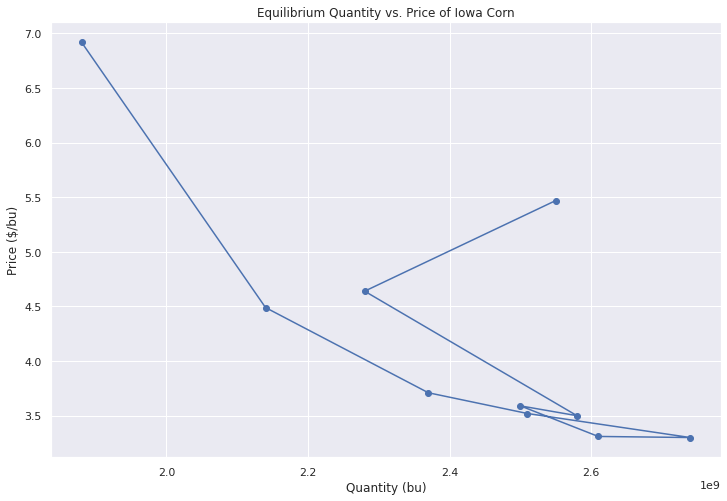

In [5]:
sns.set_theme()

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(quantity, price)
ax.plot(quantity, price)
ax.set(title="Equilibrium Quantity vs. Price of Iowa Corn", xlabel="Quantity (bu)", ylabel='Price ($/bu)')

## NOTE: I chose to do a lined scatterplot for this assignment because it helps me visually;
## If this were an actual data plot meant to be produced I would omit the lines because they're unnecessary

### Q3: Changes in Supply Curve

[Text(0.5, 1.0, 'Equilibrium Quantity vs. Price of Iowa Corn, Growing Season Favorability'),
 Text(0.5, 0, 'Quantity (bu)'),
 Text(0, 0.5, 'Price ($/bu)')]

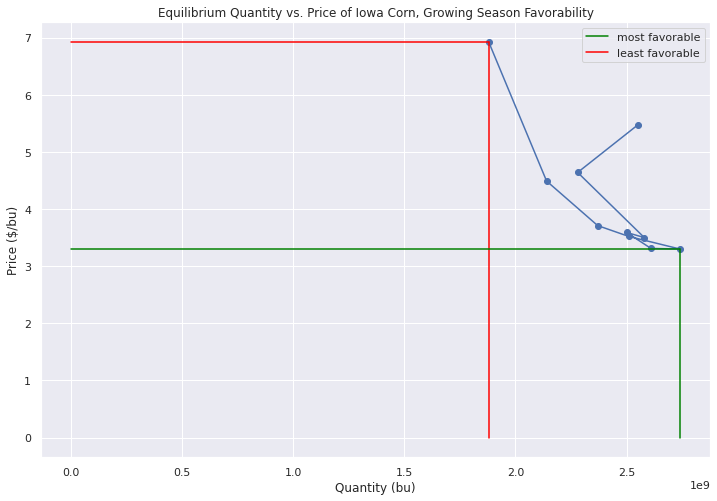

In [22]:
# most favorable harvest; highest quantity
most_q = [2740000000,2740000000]
most_p = [0,3.3]

most_q2 = [0,2740000000]
most_p2 = [3.3,3.3]

# least favorable harvest; lowest quantity
least_q = [1880000000,1880000000]
least_p = [0,6.92]

least_q2 = [0,1880000000]
least_p2 = [6.92,6.92]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(quantity, price)
ax.plot(quantity, price)
ax.plot(most_q, most_p, label="most favorable",c='green')
ax.plot(least_q, least_p,c='red')
ax.plot(most_q2, most_p2,c='green')
ax.plot(least_q2, least_p2, label="least favorable",c='red')

ax.legend()

ax.set(title="Equilibrium Quantity vs. Price of Iowa Corn, Growing Season Favorability", xlabel="Quantity (bu)", ylabel='Price ($/bu)')

A more favorable growing season will result in an increased quantity of supply, which will lower the price/bushel. A less favorable growing season will reduce the quantity of corn harvested, leading to higher prices.

[Text(0.5, 1.0, 'Supply Curve of Iowa Corn'),
 Text(0.5, 0, 'Quantity (bu)'),
 Text(0, 0.5, 'Price ($/bu)')]

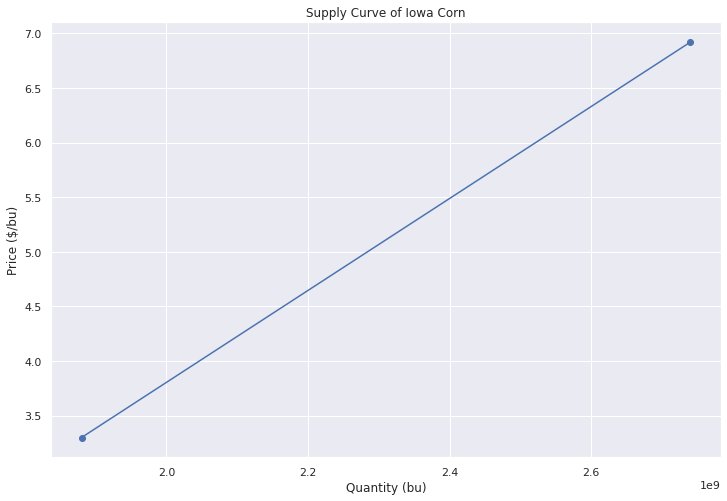

In [25]:
one = [1880000000,2740000000]
two = [3.3,6.92]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(one, two)
ax.plot(one, two)

ax.set(title="Supply Curve of Iowa Corn", xlabel="Quantity (bu)", ylabel='Price ($/bu)')

### Q4: Estimate change in GP without 2020 derecho

In [27]:
projected = 2750000000
actual = 2280000000

# estimate change in GP if derecho did not occur
# GP = 0.5Q*P

In 2016, 2.74e9 bushels of corn were harvested. The price of corn during this year was 3.3/bu. Assuming more supply = lower prices, I will estimate the price of corn as 3.2/bu

In [28]:
proj_gp=projected*3.2*0.5
actual_gp=actual*3.3*0.5

diff = actual_gp-proj_gp

print("If the derecho did not occur in 2020, there would have been a GP change of $"+str(diff))

If the derecho did not occur in 2020, there would have been a GP change of $-638000000.0


### Q5: PDSI Indices

In [29]:
wet_q=[]
wet_p=[]
dry_q=[]
dry_p=[]
norm_q=[]
norm_p=[]

for z in range(10):
    if pdsi[z]>1.99:
        wet_q.append(quantity[z])
        wet_p.append(price[z])
    elif pdsi[z]<-1.99:
        dry_q.append(quantity[z])
        dry_p.append(price[z])
    else:
        norm_q.append(quantity[z])
        norm_p.append(price[z])
    

[Text(0.5, 1.0, 'Equilibrium Quantity vs. Price of Iowa Corn (Normal vs Wet vs Dry Conditions)'),
 Text(0.5, 0, 'Quantity (bu)'),
 Text(0, 0.5, 'Price ($/bu)')]

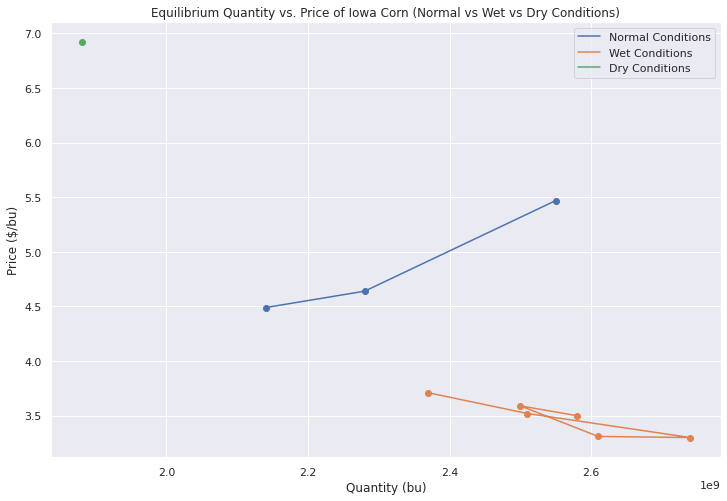

In [30]:
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(norm_q, norm_p)
ax.plot(norm_q,norm_p, label="Normal Conditions")
ax.scatter(wet_q, wet_p)
ax.plot(wet_q,wet_p, label="Wet Conditions")
ax.scatter(dry_q, dry_p)
ax.plot(dry_q,dry_p, label="Dry Conditions")
ax.legend()

ax.set(title="Equilibrium Quantity vs. Price of Iowa Corn (Normal vs Wet vs Dry Conditions)", xlabel="Quantity (bu)", ylabel='Price ($/bu)')

Wet conditions cause and increased quantity but lower price of corn, while dry conditions (note: there's only one data point) increase the price, largely due to a lower quantity.

I would not be able to comfortably predict the effects of a very dry growing season because there's only one data point for when conditions are moderately dry; there's no trendline that would assist in evaluating the exact EXTENT in which price/quantity is affected by dry conditions. I would need to look at other cases of dry-year data in order acquire a trendline that would allow me to make a more accurate predictions.